## Description:

* Image classification: 4 kinds of animals

* There are pictures with 4 kinds of animal.

* Labels: cat/deer/dog/horse

* The evaluation metric for the problem is Categorization Accuracy.

Data can be found at: https://www.kaggle.com/competitions/4-animal-classification/data

### Importing Data

In [1]:
! gdown --id 1YI-SwS6bBuwFKwn2FoQq-KZaYpwzeUuY

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1YI-SwS6bBuwFKwn2FoQq-KZaYpwzeUuY
From (redirected): https://drive.google.com/uc?id=1YI-SwS6bBuwFKwn2FoQq-KZaYpwzeUuY&confirm=t&uuid=d2da1b6f-4bfb-4b6b-a8ba-3df80e76f26f
To: /content/4-animal-classification.zip
100% 289M/289M [00:13<00:00, 21.0MB/s]


#### Unzipping the data file

In [2]:
import zipfile

zip_ref = zipfile.ZipFile("/content/4-animal-classification.zip")
zip_ref.extractall()
zip_ref.close()

#### Listing data contained in the data file

In [3]:
!ls /content/train

cat  deer  dog	horse


#### Data Folder Inspection

In [4]:
import os

# Walk through animal directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 4 directories and 0 images in '/content/train'. 
There are 0 directories and 600 images in '/content/train/deer'. 
There are 0 directories and 700 images in '/content/train/cat'. 
There are 0 directories and 600 images in '/content/train/horse'. 
There are 0 directories and 900 images in '/content/train/dog'. 


In [5]:
# Setting data directories
train_dir = "/content/train/"

In [6]:
# Instantiating class names

# Getting classnames
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cat' 'deer' 'dog' 'horse']


### Data Visulaization

In [7]:
# Visualizing the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (We'll view images from here)
  target_folder = target_dir+target_class

  # Get a random path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Shows the shape of the image
  return img

['deer_157.jpg']
Image shape: (640, 640, 3)


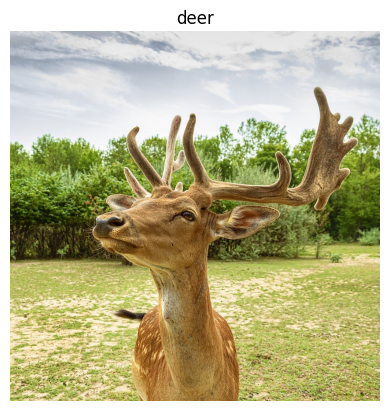

In [26]:
 # Plot image
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

#### Data Preprocessing

In [9]:
# Creating data generators and rescaling

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

In [10]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=64,
                                               target_size=(224, 224),
                                               class_mode="categorical")

Found 2800 images belonging to 4 classes.


### Buiding a ConvNet model

In [11]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Activation, Conv2D
from tensorflow.keras import Sequential

model = Sequential([
                    Conv2D(15, 5, input_shape=(224, 224, 3), activation='relu'),
                    Conv2D(14, 5, activation='relu'),
                    MaxPooling2D(),
                    Conv2D(14, 5, activation='relu'),
                    Conv2D(14, 5, activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(4, activation='softmax')
])

In [12]:
# Compiling the model

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Getting model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 15)      1140      
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 14)      5264      
                                                                 
 max_pooling2d (MaxPooling2  (None, 108, 108, 14)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 14)      4914      
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 14)      4914      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 14)        0         
 g2D)                                                   

In [13]:
# Model Fitting

history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data))

Epoch 1/10
44/44 [==============================] - 29s 460ms/step - loss: 1.3617 - accuracy: 0.3275
Epoch 2/10
44/44 [==============================] - 14s 320ms/step - loss: 1.3104 - accuracy: 0.3800
Epoch 3/10
44/44 [==============================] - 15s 331ms/step - loss: 1.2730 - accuracy: 0.4271
Epoch 4/10
44/44 [==============================] - 14s 320ms/step - loss: 1.1648 - accuracy: 0.4875
Epoch 5/10
44/44 [==============================] - 15s 325ms/step - loss: 1.0164 - accuracy: 0.5739
Epoch 6/10
44/44 [==============================] - 14s 306ms/step - loss: 0.8142 - accuracy: 0.6736
Epoch 7/10
44/44 [==============================] - 14s 316ms/step - loss: 0.6473 - accuracy: 0.7525
Epoch 8/10
44/44 [==============================] - 14s 316ms/step - loss: 0.4077 - accuracy: 0.8489
Epoch 9/10
44/44 [==============================] - 14s 316ms/step - loss: 0.2004 - accuracy: 0.9343
Epoch 10/10
44/44 [==============================] - 14s 317ms/step - loss: 0.1427 - accura

### Training Evaluation

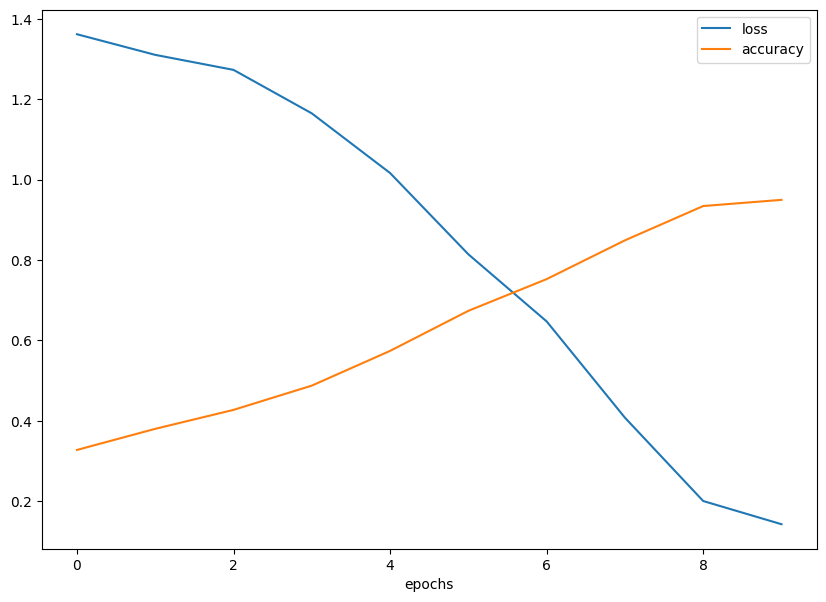

In [15]:
# Plotting loss curves

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.xlabel('epochs');

### Model Testing

In [16]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename and turns it into a tensor and reshapes it
  into (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Reisze the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (Normalize)
  img = img/255.
  return img


In [17]:
def pred_plot(model, filename, class_names):
  """
  Imports and image at fileneme, makes a prediction with model
  and plots the image with predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add logic for multi-class and get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
     pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


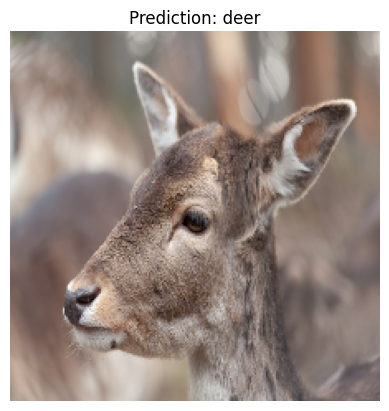

In [24]:
pred_plot(model,
          "/content/test/test/1.jpg",
          class_names)

# Saving the model

In [25]:
model.save("saved_animal_model")